# Домашняя работа №3 (Курс "Advanced Python", 2 семестр)
## ФИО: Григорьев Владимир Евгеньевич

**Тема:** Машинное обучение  
**Выдана:** 12 апреля  
**Мягкий дедлайн:** 19 апреля  
**Жесткий дедлайн:** 24 апреля

# MNIST (10 баллов)
Давайте посмотрим на еще один классический датасет. В нем необходимо классифицировать цифры на изображении

In [4]:
from sklearn.datasets import fetch_openml

In [5]:
#эта команда может выполняться несколько минут
mnist = fetch_openml('mnist_784', version=1)

In [37]:
print("Размерность данных" , mnist.data.shape)

Размерность данных (70000, 784)


Каждое изображение представляет собой матрицу 28*28 (вектор из 784 значений)

In [38]:
mnist.data[0].reshape((28,28)) #вектор представил в виде матрицы 28*28

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0

In [39]:
#Изображенные цифры (метки классов) содержатся в 
mnist.target

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

**Пункт 0 (0.2 балла)**: разделите данные на обучающую и тестовую выборку. На тест оставьте 10% данных

In [293]:
from sklearn.model_selection import  train_test_split #имя требуемой функции здесь

X_train, X_test, y_train, y_test =  train_test_split(mnist.data, mnist.target, test_size = 0.1, random_state=1)#деление выборки

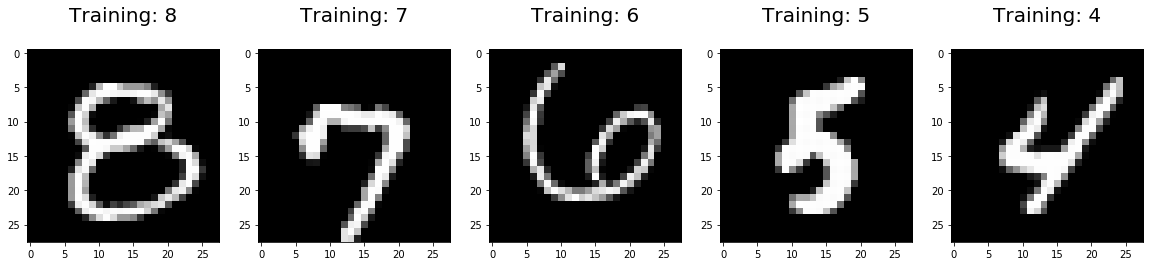

In [46]:
# Посмотрим, как выглядят наши цифры
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(X_train[0:5], y_train[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title('Training: %s\n' % label, fontsize = 20)

# Модели без предобработки

**Пункт 1.1 (1 балл):** Постройте 3 линейные модели на изображениях как есть (используйте все 784 признака без предобработки). Постройте Логистическую регрессию, а также линейную модель с L2(ridge) и L1(lasso) регуляризаторами. Как долго учились модели? 

**За каждое отсутствие ответа на текстовые вопросы (в том числе за пункты, без проставления баллов) - минус пол балла**

In [309]:
%%time
from sklearn.linear_model import LogisticRegression, RidgeClassifier, Lasso
from time import time

start = time()
model1 = LogisticRegression()
model1.fit(X_train, y_train)
print(time() - start,'for LogisticRegression')

start = time()
model2 = RidgeClassifier()
model2.fit(X_train, y_train)
print(time() - start,'for Ridge')

start = time()
model3 = Lasso()
model3.fit(X_train, y_train)
print(time() - start,'for Lasso')

C:\Users\57662\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


30.481616735458374 for LogisticRegression
3.5743775367736816 for Ridge
10.454045534133911 for Lasso
Wall time: 44.5 s


LogisticRegression обучается 30 секунд,

RidgeClassifier обучается 3.5 секунды,

Lasso обучается 10 секунд

Ridge Classifier самый быстрый

**Пункт 1.2 (3 балла):** Постройте kNN классификатор, случайный лес, а также бустинг над деревьями. Подберите оптимальные гиперпараметры для каждой модели (вам может помочь поиск по сетке)

Оптимизация RandomForestClassifier:

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

clf_rf = RandomForestClassifier()

params = {'n_estimators' : [10, 20 ,30], 'max_depth' : [2, 5, 7, 10]}

grid_search_cv_clf = GridSearchCV(clf_rf, params, cv=5)

grid_search_cv_clf.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 5, 7, 10],
                         'n_estimators': [10, 20, 30]})

In [12]:
grid_search_cv_clf.best_params_

{'max_depth': 10, 'n_estimators': 30}

In [15]:
grid_search_cv_clf.best_estimator_.score(X_test,y_test)

0.9410285714285714

__В итоге оптимальные параметры max_depth = 10, n_estimators = 30,__

__Точность 94%__

Оптимизация KNeighborsClassifier:

In [36]:
from sklearn.neighbors import KNeighborsClassifier

clf_KNN = KNeighborsClassifier()

params = {'n_neighbors' : [3, 5, 10], 'leaf_size' : [5, 10, 20]}

grid_search_cv_clf_KNN = GridSearchCV(clf_KNN, params, cv=5)

grid_search_cv_clf_KNN.fit(X_train[:20000], y_train[:20000])

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [5, 10, 20], 'n_neighbors': [3, 5, 10]})

In [37]:
grid_search_cv_clf_KNN.best_params_

{'leaf_size': 5, 'n_neighbors': 5}

In [47]:
grid_search_cv_clf_KNN.best_estimator_.score(X_test[:20000],y_test[:20000])

0.9581714285714286

__Оптимальные параметры leaf_size = 5, n_neighbors = 5,__

__Точность 96%__

Оптимизация GradientBoostingClassifier(на совсем маленькой вборке, он долго считается):

In [48]:
from sklearn.ensemble import GradientBoostingClassifier

clf_Boost = GradientBoostingClassifier()

params = {'learning_rate' : [0.1, 0.5], 'max_depth' : [5, 10]}

grid_search_cv_clf_Boost = GridSearchCV(clf_Boost, params, cv=5)

grid_search_cv_clf_Boost.fit(X_train[:1000], y_train[:1000])

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.5], 'max_depth': [5, 10]})

In [49]:
grid_search_cv_clf_Boost.best_params_

{'learning_rate': 0.5, 'max_depth': 5}

In [50]:
grid_search_cv_clf_Boost.best_estimator_.score(X_test[:200],y_test[:200])

0.835

__Оптимальные параметры learning_rate = 0.5, max_depth = 5,__

__Точность 84%__

**Пункт 2.3 (0.2 балла)**: получите confusion матицы ваших классификаторов

In [335]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, grid_search_cv_clf.best_estimator_.predict(X_test))

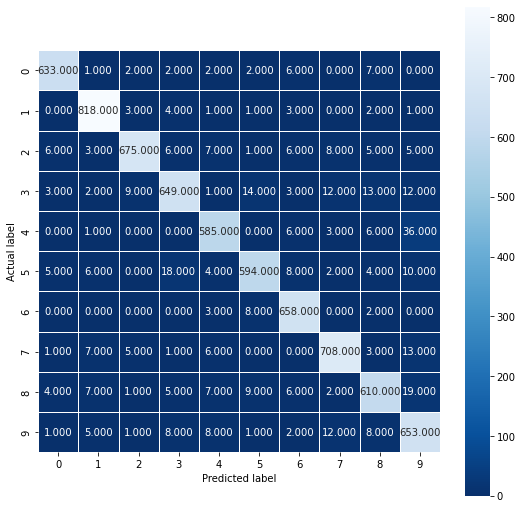

In [336]:
#построим красивую визуализацию
import seaborn as sns
plt.figure(figsize=(9,9))
sns.heatmap(conf_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

In [338]:
conf_matrix = confusion_matrix(y_test[:1000], grid_search_cv_clf_KNN.best_estimator_.predict(X_test[:1000]))

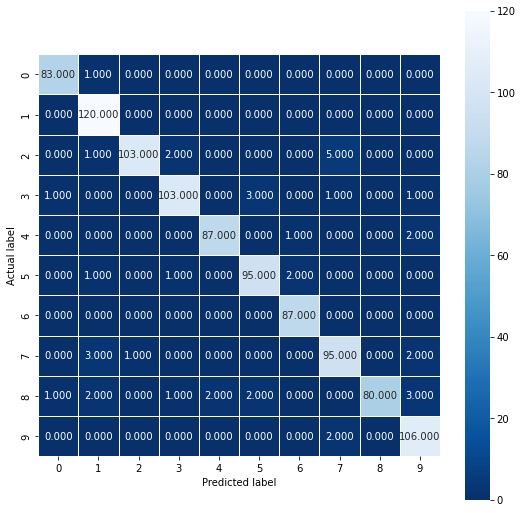

In [339]:
import seaborn as sns
plt.figure(figsize=(9,9))
sns.heatmap(conf_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

In [340]:
conf_matrix = confusion_matrix(y_test[:1000], grid_search_cv_clf_Boost.best_estimator_.predict(X_test[:1000]))

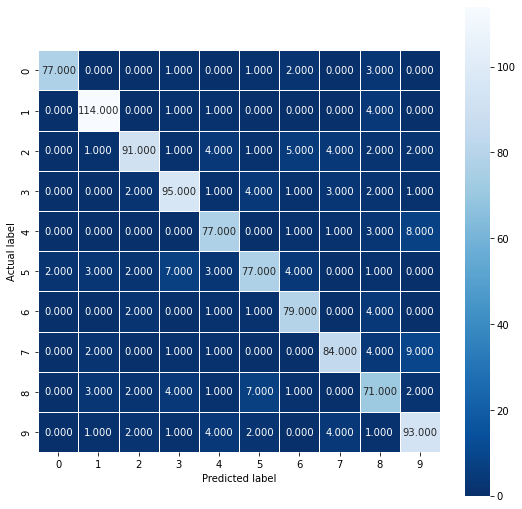

In [341]:
import seaborn as sns
plt.figure(figsize=(9,9))
sns.heatmap(conf_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

# Понижаем размерность

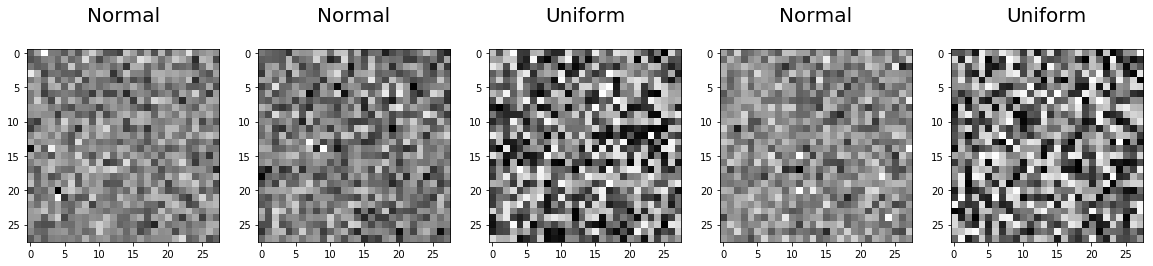

In [73]:
plt.figure(figsize=(20,4))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    #сгенерируем из равномерного или нормального распределений
    is_normal = np.random.randint(0,2)
    if is_normal:
        image = np.random.randn(784)
    else:
        image = np.random.randint(0, 255, 784)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    
    label = "Normal" if is_normal else "Uniform"
    plt.title('%s\n' % label, fontsize = 20)

Заметим, что наши изображения далеки от случайного шума, т.е наши данные явно имеют размерность ниже, чем 784

**Пункт 3.1:** используя t-SNE, постройте визуализацию объектов на плоскости (чтобы все отрисовалось быстрее, стройте не на всей выборке, а только на 2000 элементах). Насколько хорошо выделились классы?

### В пунктах 3 и 4 работаем только с подвыборкой размера 2000!

In [196]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1, random_state=123)
tsne_fit = tsne.fit_transform(X_train[:2000]) 

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.004s...
[t-SNE] Computed neighbors for 2000 samples in 0.263s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 561.007715
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.271156
[t-SNE] KL divergence after 1000 iterations: 1.242238


In [197]:
import pandas as pd
tsne_colors= pd.DataFrame()
tsne_colors['colors'] = y_train[:2000]
tsne_colors['1'] = tsne_fit[:,0]
tsne_colors['2'] = tsne_fit[:,1]
tsne_colors.head()

,colors,1,2
58105,4,16.483376,-26.032578
22589,0,27.664076,48.726883
4183,2,0.177452,-23.814333
18670,6,9.444627,3.014765
41299,3,1.642501,-3.437914


<AxesSubplot:xlabel='1', ylabel='2'>

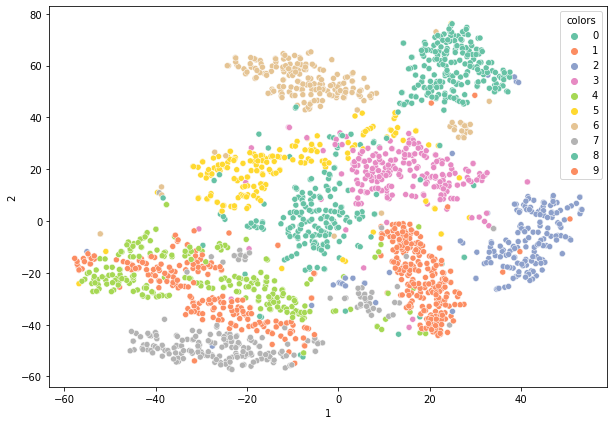

In [198]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))

import seaborn as sns
sns.scatterplot(x="1", y="2",hue="colors",palette=sns.color_palette("Set2", 10),data=tsne_colors,legend="full",alpha=1)

**Пункт 3.2 (за пункты 3.1+3.2 = 0.8 баллов)**: для сравнения постройте на тех же данных такую же визуализацию, используя метод главных компонент. Сравните две визуализации (по скорости построения, а также по качеству кластеризации)

In [232]:
from sklearn.decomposition import PCA  # дополните здесь
start = time()
pca_representation = PCA().fit_transform(X_train[:10000])  # ваш код здесь
print(f'PCA Learning time = {time() - start} seconds')


PCA Learning time = 1.5222246646881104 seconds


<AxesSubplot:xlabel='pca-2d-one', ylabel='pca-2d-two'>

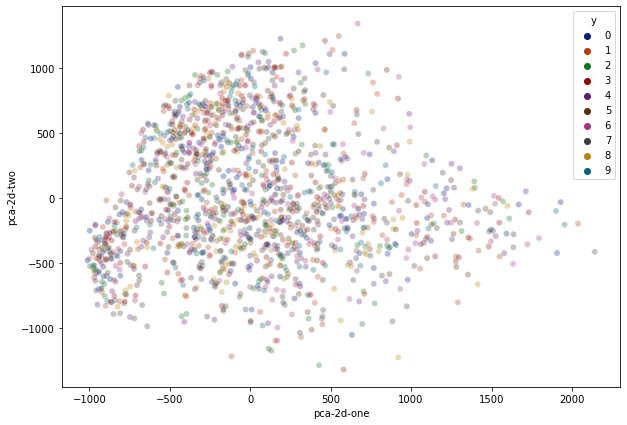

In [107]:
pca_repr = pd.DataFrame()
pca_repr['pca-2d-one'] = pca_representation[:,0]
pca_repr['pca-2d-two'] = pca_representation[:,1]
pca_repr["y"] = y_train[:10000]

plt.figure(figsize=(10,7))
sns.scatterplot(
    x="pca-2d-one", y="pca-2d-two",
    hue="y",
    palette=sns.color_palette("dark", 10),
    data=pca_repr,
    legend="full",
    alpha=0.3
)


# Кластеризация
Давайте временно отвлечемся на данные tsne_repr, полученные применением t-SNE к 2000 объектам train данных

In [108]:
tsne_colors.head()

,colors,1,2
58105,4,16.483376,-26.032578
22589,0,27.664076,48.726883
4183,2,0.177452,-23.814333
18670,6,9.444627,3.014765
41299,3,1.642501,-3.437914


**Пункт 4.1: (1 балл)** Давайте посмотрим на работу алгоритма DBSCAN (не передавайте метку класса y!). Зафиксируем минимальное количество объектов в корневой точке - 55. Подберите радиус окрестности (может быть дробным), чтобы dbscan выделил ровно 10 классов (включая класс выбросов "-1"), но так, чтобы в каждом классе (в шумовом в том числе) было не более 400 объектов. Последнее ограничение введено затем, чтобы большинство объектов не попало в один большой кластер, а остальные кластера оказались незначительно мелкими

In [220]:
from sklearn.cluster import DBSCAN

dbscan_repr = DBSCAN(min_samples=55, eps=7.7).fit_predict(tsne_colors.iloc[:, 1:3])

In [225]:
import numpy as np
len(np.unique(dbscan_repr)) #10 цифр

10

**Посмотрите на визуализацию точек выше, насколько адекватно был выбран радиус окрестности?**

Посмотрим, насклько качественно отработал DBSCAN

<AxesSubplot:xlabel='1', ylabel='2'>

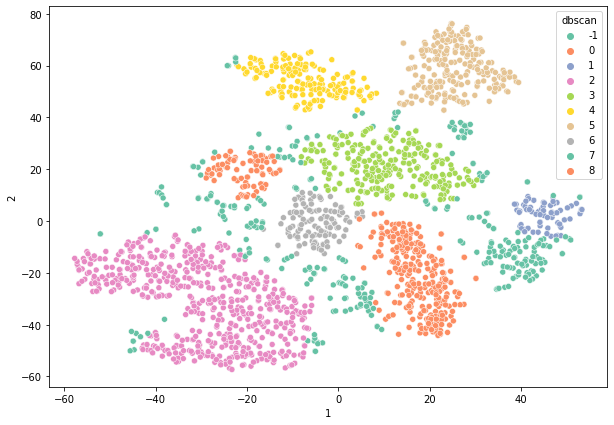

In [230]:
tsne_colors["dbscan"] = dbscan_repr

plt.figure(figsize=(10,7))
sns.scatterplot(
    x="1", y="2",
    hue="dbscan",
    palette=sns.color_palette("Set2", 10),
    data=tsne_colors,
    legend="full",
    alpha=1
)

**Пункт 5.1 (1 балл)**. Вернитесь ко всей выборке. Пользуясь критерием крутого спуска найдите характерную размерность данных.   
**Пункт 5.2 (1 балл)** Во время поиска эффективной размерности, ужимайте Train и test выборку до текущей раземрности и стройте понравивщуюся линейную модель на train данных, записывайте метрику качества на тестовых данных. Постройте график зависимости качества от размерности. Верно ли, что с качеством наблюдается такая же тенденция, что и с сохраненной дисперсией? Наблюдается ли крутой спуск/подъем? Если да, то происходит ли он на эффективном значении расзмерноти (где наблюдается крутой спуск потерянной дисперсии)?

In [234]:
pca = PCA()
pca.fit(mnist.data)

PCA()

No handles with labels found to put in legend.


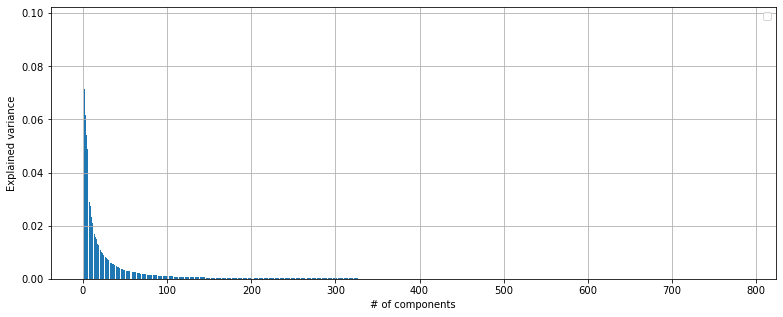

In [271]:
plt.figure(figsize=(13, 5))
plt.bar(range(1, 785), pca.explained_variance_ratio_)
plt.xlabel('PrincipalСomponents')
plt.ylabel('Explained variance')
plt.grid()
plt.legend()

Видно, что в районе 100 на каждую компоненту уже почти не приходится вариации, значит в них содержится мало информации.

Для следующего задания (5.2) воспользуемся RingeClassifier, т.к. он самый быстрый

In [272]:
from sklearn.pipeline import Pipeline
def get_models(n_dim):
    models = dict()
    for i in range(1, n_dim+1):
        steps = [('pca', PCA(n_components=i)), ('m', RidgeClassifier())]
        models[str(i)] = Pipeline(steps=steps)
    return models
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [273]:
from tqdm import tqdm

In [274]:
models = get_models(100) 
results, names = list(), list()
for name, model in tqdm(models.items()):
    score = evaluate_model(model, X_train, y_train, X_test, y_test)
    results.append(score)
    names.append(name)
    print(name, score)

  1%|▊                                                                                 | 1/100 [00:35<58:22, 35.38s/it]

1 0.2104


  2%|█▋                                                                                | 2/100 [00:37<25:58, 15.90s/it]

2 0.3302857142857143


  3%|██▍                                                                               | 3/100 [00:40<15:44,  9.73s/it]

3 0.38394285714285714


  4%|███▎                                                                              | 4/100 [00:42<10:55,  6.83s/it]

4 0.4821142857142857


  5%|████                                                                              | 5/100 [00:45<08:25,  5.32s/it]

5 0.5568


  6%|████▉                                                                             | 6/100 [00:47<06:51,  4.37s/it]

6 0.6178857142857143


  7%|█████▋                                                                            | 7/100 [00:50<05:50,  3.76s/it]

7 0.6487428571428572


  8%|██████▌                                                                           | 8/100 [00:53<05:21,  3.50s/it]

8 0.6896571428571429


  9%|███████▍                                                                          | 9/100 [00:55<04:54,  3.24s/it]

9 0.6948571428571428


 10%|████████                                                                         | 10/100 [00:58<04:32,  3.02s/it]

10 0.7026285714285714


 11%|████████▉                                                                        | 11/100 [01:00<04:18,  2.90s/it]

11 0.7038857142857143


 12%|█████████▋                                                                       | 12/100 [01:03<04:15,  2.91s/it]

12 0.7124571428571429


 13%|██████████▌                                                                      | 13/100 [01:07<04:27,  3.08s/it]

13 0.7276


 14%|███████████▎                                                                     | 14/100 [01:10<04:41,  3.27s/it]

14 0.7377142857142858


 15%|████████████▏                                                                    | 15/100 [01:13<04:28,  3.16s/it]

15 0.7430285714285715


 16%|████████████▉                                                                    | 16/100 [01:16<04:23,  3.14s/it]

16 0.7696


 17%|█████████████▊                                                                   | 17/100 [01:19<04:14,  3.06s/it]

17 0.7801142857142858


 18%|██████████████▌                                                                  | 18/100 [01:23<04:20,  3.18s/it]

18 0.7826285714285715


 19%|███████████████▍                                                                 | 19/100 [01:26<04:15,  3.16s/it]

19 0.7925142857142857


 20%|████████████████▏                                                                | 20/100 [01:29<04:14,  3.18s/it]

20 0.8011428571428572


 21%|█████████████████                                                                | 21/100 [01:32<04:13,  3.21s/it]

21 0.8021714285714285


 22%|█████████████████▊                                                               | 22/100 [01:36<04:07,  3.17s/it]

22 0.8043428571428571


 23%|██████████████████▋                                                              | 23/100 [01:39<04:07,  3.21s/it]

23 0.8082857142857143


 24%|███████████████████▍                                                             | 24/100 [01:42<04:04,  3.22s/it]

24 0.8084


 25%|████████████████████▎                                                            | 25/100 [01:46<04:23,  3.51s/it]

25 0.8104571428571429


 26%|█████████████████████                                                            | 26/100 [01:49<04:13,  3.43s/it]

26 0.8153142857142858


 27%|█████████████████████▊                                                           | 27/100 [01:53<04:07,  3.39s/it]

27 0.8168571428571428


 28%|██████████████████████▋                                                          | 28/100 [01:56<04:04,  3.40s/it]

28 0.8170857142857143


 29%|███████████████████████▍                                                         | 29/100 [02:00<04:04,  3.44s/it]

29 0.8162285714285714


 30%|████████████████████████▎                                                        | 30/100 [02:04<04:09,  3.56s/it]

30 0.8188


 31%|█████████████████████████                                                        | 31/100 [02:07<04:11,  3.65s/it]

31 0.8172


 32%|█████████████████████████▉                                                       | 32/100 [02:11<04:08,  3.66s/it]

32 0.8206285714285714


 33%|██████████████████████████▋                                                      | 33/100 [02:15<04:05,  3.67s/it]

33 0.8226857142857142


 34%|███████████████████████████▌                                                     | 34/100 [02:18<04:00,  3.64s/it]

34 0.8252571428571429


 35%|████████████████████████████▎                                                    | 35/100 [02:22<03:59,  3.68s/it]

35 0.8259428571428571


 36%|█████████████████████████████▏                                                   | 36/100 [02:27<04:17,  4.02s/it]

36 0.8271428571428572


 37%|█████████████████████████████▉                                                   | 37/100 [02:31<04:13,  4.03s/it]

37 0.8276


 38%|██████████████████████████████▊                                                  | 38/100 [02:35<04:04,  3.94s/it]

38 0.8278857142857143


 39%|███████████████████████████████▌                                                 | 39/100 [02:39<03:59,  3.92s/it]

39 0.8288571428571428


 40%|████████████████████████████████▍                                                | 40/100 [02:42<03:54,  3.91s/it]

40 0.8322857142857143


 41%|█████████████████████████████████▏                                               | 41/100 [02:47<03:52,  3.94s/it]

41 0.8352571428571428


 42%|██████████████████████████████████                                               | 42/100 [02:51<03:50,  3.97s/it]

42 0.8356


 43%|██████████████████████████████████▊                                              | 43/100 [02:55<03:48,  4.01s/it]

43 0.8361714285714286


 44%|███████████████████████████████████▋                                             | 44/100 [02:59<03:54,  4.19s/it]

44 0.8373142857142857


 45%|████████████████████████████████████▍                                            | 45/100 [03:04<03:52,  4.22s/it]

45 0.8379428571428571


 46%|█████████████████████████████████████▎                                           | 46/100 [03:08<03:54,  4.35s/it]

46 0.8386857142857143


 47%|██████████████████████████████████████                                           | 47/100 [03:12<03:48,  4.31s/it]

47 0.8400571428571428


 48%|██████████████████████████████████████▉                                          | 48/100 [03:17<03:44,  4.31s/it]

48 0.8396


 49%|███████████████████████████████████████▋                                         | 49/100 [03:21<03:40,  4.32s/it]

49 0.8396571428571429


 50%|████████████████████████████████████████▌                                        | 50/100 [03:25<03:35,  4.32s/it]

50 0.8403428571428572


 51%|█████████████████████████████████████████▎                                       | 51/100 [03:30<03:32,  4.34s/it]

51 0.8403428571428572


 52%|██████████████████████████████████████████                                       | 52/100 [03:35<03:35,  4.49s/it]

52 0.8409142857142857


 53%|██████████████████████████████████████████▉                                      | 53/100 [03:42<04:08,  5.30s/it]

53 0.8412


 54%|███████████████████████████████████████████▋                                     | 54/100 [03:49<04:23,  5.73s/it]

54 0.8426857142857143


 55%|████████████████████████████████████████████▌                                    | 55/100 [03:54<04:18,  5.74s/it]

55 0.8435428571428571


 56%|█████████████████████████████████████████████▎                                   | 56/100 [03:59<04:01,  5.50s/it]

56 0.8434285714285714


 57%|██████████████████████████████████████████████▏                                  | 57/100 [04:04<03:47,  5.29s/it]

57 0.8436


 58%|██████████████████████████████████████████████▉                                  | 58/100 [04:09<03:37,  5.17s/it]

58 0.8443428571428572


 59%|███████████████████████████████████████████████▊                                 | 59/100 [04:14<03:29,  5.11s/it]

59 0.8440571428571428


 60%|████████████████████████████████████████████████▌                                | 60/100 [04:19<03:22,  5.06s/it]

60 0.8442285714285714


 61%|█████████████████████████████████████████████████▍                               | 61/100 [04:24<03:15,  5.02s/it]

61 0.844


 62%|██████████████████████████████████████████████████▏                              | 62/100 [04:29<03:08,  4.95s/it]

62 0.8448


 63%|███████████████████████████████████████████████████                              | 63/100 [04:34<03:06,  5.03s/it]

63 0.8452571428571428


 64%|███████████████████████████████████████████████████▊                             | 64/100 [04:40<03:13,  5.38s/it]

64 0.8461714285714286


 65%|████████████████████████████████████████████████████▋                            | 65/100 [04:46<03:17,  5.64s/it]

65 0.8467428571428571


 66%|█████████████████████████████████████████████████████▍                           | 66/100 [04:52<03:15,  5.75s/it]

66 0.8462285714285714


 67%|██████████████████████████████████████████████████████▎                          | 67/100 [04:58<03:07,  5.69s/it]

67 0.8471428571428572


 68%|███████████████████████████████████████████████████████                          | 68/100 [05:03<02:56,  5.53s/it]

68 0.846


 69%|███████████████████████████████████████████████████████▉                         | 69/100 [05:08<02:50,  5.50s/it]

69 0.8457142857142858


 70%|████████████████████████████████████████████████████████▋                        | 70/100 [05:14<02:42,  5.41s/it]

70 0.8458285714285714


 71%|█████████████████████████████████████████████████████████▌                       | 71/100 [05:19<02:36,  5.40s/it]

71 0.8450857142857143


 72%|██████████████████████████████████████████████████████████▎                      | 72/100 [05:24<02:32,  5.43s/it]

72 0.8451428571428572


 73%|███████████████████████████████████████████████████████████▏                     | 73/100 [05:30<02:26,  5.43s/it]

73 0.8452571428571428


 74%|███████████████████████████████████████████████████████████▉                     | 74/100 [05:35<02:19,  5.37s/it]

74 0.8451428571428572


 75%|████████████████████████████████████████████████████████████▊                    | 75/100 [05:41<02:15,  5.42s/it]

75 0.8451428571428572


 76%|█████████████████████████████████████████████████████████████▌                   | 76/100 [05:46<02:11,  5.48s/it]

76 0.8454857142857143


 77%|██████████████████████████████████████████████████████████████▎                  | 77/100 [05:52<02:07,  5.55s/it]

77 0.8458285714285714


 78%|███████████████████████████████████████████████████████████████▏                 | 78/100 [05:57<02:00,  5.50s/it]

78 0.8459428571428571


 79%|███████████████████████████████████████████████████████████████▉                 | 79/100 [06:01<01:46,  5.07s/it]

79 0.8463428571428572


 80%|████████████████████████████████████████████████████████████████▊                | 80/100 [06:06<01:36,  4.80s/it]

80 0.846


 81%|█████████████████████████████████████████████████████████████████▌               | 81/100 [06:11<01:32,  4.88s/it]

81 0.848


 82%|██████████████████████████████████████████████████████████████████▍              | 82/100 [06:15<01:25,  4.77s/it]

82 0.8473142857142857


 83%|███████████████████████████████████████████████████████████████████▏             | 83/100 [06:20<01:20,  4.75s/it]

83 0.8477142857142858


 84%|████████████████████████████████████████████████████████████████████             | 84/100 [06:25<01:16,  4.77s/it]

84 0.8469714285714286


 85%|████████████████████████████████████████████████████████████████████▊            | 85/100 [06:30<01:15,  5.02s/it]

85 0.8472571428571428


 86%|█████████████████████████████████████████████████████████████████████▋           | 86/100 [06:36<01:13,  5.22s/it]

86 0.8488


 87%|██████████████████████████████████████████████████████████████████████▍          | 87/100 [06:40<01:04,  4.97s/it]

87 0.8471428571428572


 88%|███████████████████████████████████████████████████████████████████████▎         | 88/100 [06:45<00:57,  4.79s/it]

88 0.8477142857142858


 89%|████████████████████████████████████████████████████████████████████████         | 89/100 [06:49<00:51,  4.67s/it]

89 0.8484571428571429


 90%|████████████████████████████████████████████████████████████████████████▉        | 90/100 [06:53<00:45,  4.56s/it]

90 0.8481142857142857


 91%|█████████████████████████████████████████████████████████████████████████▋       | 91/100 [06:58<00:40,  4.54s/it]

91 0.8472571428571428


 92%|██████████████████████████████████████████████████████████████████████████▌      | 92/100 [07:03<00:36,  4.56s/it]

92 0.8485142857142857


 93%|███████████████████████████████████████████████████████████████████████████▎     | 93/100 [07:07<00:32,  4.59s/it]

93 0.8482285714285714


 94%|████████████████████████████████████████████████████████████████████████████▏    | 94/100 [07:12<00:27,  4.60s/it]

94 0.8488571428571429


 95%|████████████████████████████████████████████████████████████████████████████▉    | 95/100 [07:16<00:22,  4.57s/it]

95 0.8490285714285715


 96%|█████████████████████████████████████████████████████████████████████████████▊   | 96/100 [07:21<00:18,  4.58s/it]

96 0.8479428571428571


 97%|██████████████████████████████████████████████████████████████████████████████▌  | 97/100 [07:26<00:14,  4.78s/it]

97 0.8473714285714286


 98%|███████████████████████████████████████████████████████████████████████████████▍ | 98/100 [07:32<00:10,  5.02s/it]

98 0.8477714285714286


 99%|████████████████████████████████████████████████████████████████████████████████▏| 99/100 [07:36<00:04,  4.95s/it]

99 0.848


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [07:41<00:00,  4.62s/it]

100 0.8483428571428572


No handles with labels found to put in legend.


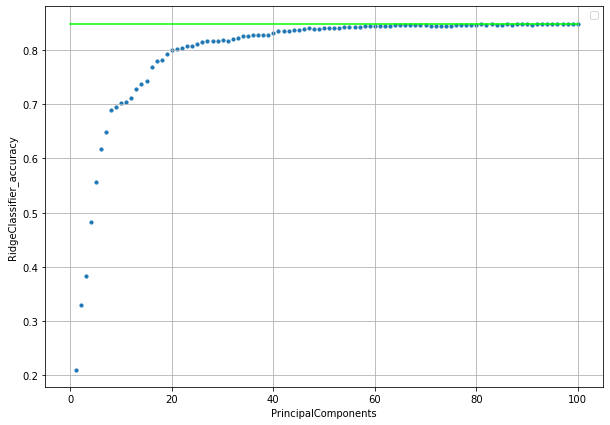

In [281]:
plt.figure(figsize=(10, 7))
plt.scatter(range(1, len(results)+1), np.array(results), s=10)
plt.plot(np.linspace(0, 100, 100), [0.8483428571428572]*100, 'lime')
plt.xlabel('PrincipalComponents')
plt.ylabel('RidgeClassifier_accuracy')
plt.grid()
plt.legend()

График выходит на плато в точке 60.

# Строим модели на данных меньшей размерности
Понизьте размерность данных до эффективной размерности 

**Пункт 6.1 (0.9 баллов)** Постройте линейные модели, kNN классификатор, случайный лес, а также бустинг над деревьями. Подберите оптимальные гиперпараметры для каждой модели. Сравните качества с достигнутыми качествами до понижения размерности. Сделайте выводы.

In [294]:
pca = PCA(n_components=60)
pca.fit(mnist.data)

PCA(n_components=60)

In [296]:
X_train_PCA = pca.transform(X_train)
X_test_PCA = pca.transform(X_test)

Классификаторы:

In [298]:
params = {'n_estimators' : [10, 20 ,30], 'max_depth' : [2, 5, 7, 10]}

grid_search_cv_rf_PCA = GridSearchCV(clf_rf, params, cv=5)

grid_search_cv_rf_PCA.fit(X_train_PCA, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 5, 7, 10],
                         'n_estimators': [10, 20, 30]})

In [301]:
grid_search_cv_rf_PCA.best_params_

{'max_depth': 10, 'n_estimators': 30}

In [303]:
grid_search_cv_rf_PCA.best_estimator_.score(X_test_PCA,y_test)

0.9015714285714286

In [299]:
params_KNN = {'n_neighbors' : [3, 5, 10], 'leaf_size' : [5, 10, 20]}

grid_search_cv_KNN_PCA = GridSearchCV(clf_KNN, params_KNN, cv=5)

grid_search_cv_KNN_PCA.fit(X_train_PCA[:20000], y_train[:20000])

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [5, 10, 20], 'n_neighbors': [3, 5, 10]})

In [304]:
grid_search_cv_KNN_PCA.best_params_

{'leaf_size': 5, 'n_neighbors': 3}

In [305]:
grid_search_cv_KNN_PCA.best_estimator_.score(X_test_PCA,y_test)

0.9654285714285714

In [300]:
params_Boost = {'learning_rate' : [0.1, 0.5], 'max_depth' : [5, 10]}

grid_search_cv_Boost_PCA = GridSearchCV(clf_Boost, params_Boost, cv=5)

grid_search_cv_Boost_PCA.fit(X_train_PCA[:1000], y_train[:1000])

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.5], 'max_depth': [5, 10]})

In [306]:
grid_search_cv_Boost_PCA.best_params_

{'learning_rate': 0.5, 'max_depth': 5}

In [307]:
grid_search_cv_Boost_PCA.best_estimator_.score(X_test_PCA,y_test)

0.8168571428571428

Как видим, оптимальные параметры остались прежними для всех классификаторов, 

При этом хуже угадывать цифры стал только RandomForestClassifier

Линейные модели:

In [311]:
%%time

start = time()
model1_PCA = LogisticRegression()
model1_PCA.fit(X_train_PCA, y_train)
print(time() - start,'for LogisticRegression')

start = time()
model2_PCA = RidgeClassifier()
model2_PCA.fit(X_train_PCA, y_train)
print(time() - start,'for Ridge')

start = time()
model3_PCA = Lasso()
model3_PCA.fit(X_train_PCA, y_train)
print(time() - start,'for Lasso')

C:\Users\57662\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


10.265628337860107 for LogisticRegression
0.5932121276855469 for Ridge
0.18065881729125977 for Lasso
Wall time: 11 s


Как и ожидалось, время обучения на комплекте с пониженной размерностью уменишилось.

In [312]:
model1_PCA.score(X_test_PCA, y_test), model1.score(X_test, y_test)

(0.8997142857142857, 0.9155714285714286)

In [321]:
Linear_Accuracy = pd.DataFrame()
Before_PCA = [model1.score(X_test, y_test),model2.score(X_test, y_test),model3.score(X_test, y_test)]
After_PCA = [model1_PCA.score(X_test_PCA, y_test),model2_PCA.score(X_test_PCA, y_test),model3_PCA.score(X_test_PCA, y_test)]
Linear_Accuracy['Before_PCA'] = Before_PCA
Linear_Accuracy['After_PCA'] = After_PCA
Linear_Accuracy.index = ['Logistic', 'Ridge','Lasso']
Linear_Accuracy

,Before_PCA,After_PCA
Logistic,0.915571,0.899714
Ridge,0.842714,0.845286
Lasso,0.605030,0.561363


**Пункт 6.2 (0.9 баллов)** Отнормируйте признаки используя StandardScaler. Постройте те же типы моделей, что и в предыдущем пункте, подберите оптимальные гиперпараметры. Сравните метрики качества, сделайте выводы

In [322]:
from sklearn.preprocessing import StandardScaler

In [323]:
scaler = StandardScaler()

scaled = scaler.fit_transform(mnist.data)
X_train_scaled, X_test_scaled = scaler.transform(X_train), scaler.transform(X_test)

pca.fit(scaled)
X_train_scaled_PCA, X_test_scaled_PCA = pca.transform(X_train_scaled), pca.transform(X_test_scaled)

In [324]:
params = {'n_estimators' : [10, 20 ,30], 'max_depth' : [2, 5, 7, 10]}

grid_search_cv_rf_scaled_PCA = GridSearchCV(clf_rf, params, cv=5)

grid_search_cv_rf_scaled_PCA.fit(X_train_scaled_PCA, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 5, 7, 10],
                         'n_estimators': [10, 20, 30]})

In [327]:
grid_search_cv_rf_scaled_PCA.best_params_

{'max_depth': 10, 'n_estimators': 30}

In [326]:
grid_search_cv_rf_scaled_PCA.best_estimator_.score(X_test_scaled_PCA,y_test)

0.9025714285714286

In [325]:
params_KNN = {'n_neighbors' : [3, 5, 10], 'leaf_size' : [5, 10, 20]}

grid_search_cv_KNN_scaled_PCA = GridSearchCV(clf_KNN, params_KNN, cv=5)

grid_search_cv_KNN_scaled_PCA.fit(X_train_scaled_PCA[:20000], y_train[:20000])

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [5, 10, 20], 'n_neighbors': [3, 5, 10]})

In [328]:
grid_search_cv_KNN_scaled_PCA.best_params_

{'leaf_size': 5, 'n_neighbors': 5}

__У KNN поменялся оптимальный n_neighbors!__

In [329]:
grid_search_cv_KNN_scaled_PCA.best_estimator_.score(X_test_scaled_PCA,y_test)

0.941

In [330]:
params_Boost = {'learning_rate' : [0.1, 0.5], 'max_depth' : [5, 10]}

grid_search_cv_Boost_scaled_PCA = GridSearchCV(clf_Boost, params_Boost, cv=5)

grid_search_cv_Boost_scaled_PCA.fit(X_train_scaled_PCA[:1000], y_train[:1000])

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.5], 'max_depth': [5, 10]})

In [331]:
grid_search_cv_Boost_scaled_PCA.best_params_

{'learning_rate': 0.5, 'max_depth': 5}

In [332]:
grid_search_cv_Boost_scaled_PCA.best_estimator_.score(X_test_scaled_PCA,y_test)

0.8418571428571429

Scaling повысил точность Случайного леса с градиентным бустингом.

In [333]:
%%time

start = time()
model1_scaled_PCA = LogisticRegression()
model1_scaled_PCA.fit(X_train_scaled_PCA, y_train)
print(time() - start,'for LogisticRegression')

start = time()
model2_scaled_PCA = RidgeClassifier()
model2_scaled_PCA.fit(X_train_scaled_PCA, y_train)
print(time() - start,'for Ridge')

start = time()
model3_scaled_PCA = Lasso()
model3_scaled_PCA.fit(X_train_scaled_PCA, y_train)
print(time() - start,'for Lasso')

C:\Users\57662\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


10.129515409469604 for LogisticRegression
0.5865426063537598 for Ridge
0.2739706039428711 for Lasso
Wall time: 11 s


In [334]:
PCA_and_scaling = [model1_scaled_PCA.score(X_test_scaled_PCA, y_test),model2_scaled_PCA.score(X_test_scaled_PCA, y_test),model3_scaled_PCA.score(X_test_scaled_PCA, y_test)]
Linear_Accuracy['PCA_and_scaling'] = PCA_and_scaling

Linear_Accuracy

,Before_PCA,After_PCA,PCA_and_scaling
Logistic,0.915571,0.899714,0.903143
Ridge,0.842714,0.845286,0.830286
Lasso,0.605030,0.561363,0.369442
